# Data Exploration and Storytelling #

## Introduction ##
The goal of our project is to create a topic model that can indicate the content of reviews and make it easier to group reviews into useful categories.

The goal of this notebook is to explore our Yelp restaurants data set. Specifically, our intention is to get a sense of the content of various subsets of reviews in the data. We will do this primarily by inspecting word clouds, but we will also construct some artificial "topics" (i.e. groups of words) to identify their prevalence in the data set.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from wordcloud import WordCloud, STOPWORDS

In [2]:
# Import data as DataFrame
r_df = pd.read_csv('/Users/dwalkerpage/Documents/Data_Science/Springboard/Projects/springboard/Capstone_Projects/Capstone_Project_2/Code/cleaned_restaurants_final.csv')

In [3]:
r_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4167461 entries, 0 to 4167460
Data columns (total 22 columns):
address         object
attributes      object
business_id     object
categories      object
city            object
hours           object
is_open         float64
latitude        float64
longitude       float64
name            object
postal_code     object
review_count    float64
stars_x         float64
state           object
cool            float64
date            object
funny           float64
review_id       object
stars_y         float64
text            object
useful          float64
user_id         object
dtypes: float64(9), object(13)
memory usage: 699.5+ MB


In [6]:
# Change pandas options so we can see all columns
pd.set_option('display.max_columns', 25)

In [7]:
r_df.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars_x,state,cool,date,funny,review_id,stars_y,text,useful,user_id
0,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1.0,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128.0,2.5,ON,0.0,2017-01-27 21:54:30,2.0,6W0MQHmasK0IsaoDo4bmkw,3.0,My girlfriend and I went for dinner at Emerald...,3.0,2K62MJ4CJ19L8Tp5pRfjfQ
1,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1.0,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128.0,2.5,ON,0.0,2013-06-24 23:11:30,0.0,BeeBfUxvzD4qNX4HxrgA5g,3.0,We've always been there on a Sunday so we were...,0.0,A0kENtCCoVT3m7T35zb2Vg
2,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1.0,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128.0,2.5,ON,0.0,2016-01-04 12:59:22,0.0,A1D2kUnZ0HTroFreAheNSg,3.0,"***No automatic doors, not baby friendly!*** I...",0.0,SuOLY03LW5ZcnynKhbTydA
3,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1.0,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128.0,2.5,ON,0.0,2014-05-09 02:38:43,0.0,2pf45Stf-pNew-xgTababQ,1.0,"Horrible service,\nI went there tonight with m...",1.0,lymyUak6KNcNKoDbK87MiQ
4,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1.0,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128.0,2.5,ON,2.0,2011-03-21 14:39:55,1.0,RHhlmL07evgAdPaXQV8Omg,4.0,One of the gauges of a good Chinese restaurant...,2.0,6vU0I5XgCv9OQHZ76rV6qw


## Inspecting Word Clouds ##

Let's explore some word clouds indicating word frequencies in various subsets of the reviews. Looking at word frequencies might provide some indication of topics in the reviews.

In [100]:
# Define function for constructing WordClouds
# x is a Series or DataFrame column

def Cloud(x, title=None):
    # Convert all text in reviews to lowercase to avoid duplicate words
    x = x.str.lower()
    
    # Join all reviews into a single string
    rating_text = ''.join(r for r in x)
    
    # Generate wordcloud object
    wordcloud = WordCloud(width=1500,
                          height=1200,
                          background_color='white',
                          stopwords=set(STOPWORDS)
                          ).generate(rating_text)
    
    # Construct Word Cloud plot
    _ = plt.figure(figsize=(13,13))
    _ = plt.imshow(wordcloud)
    _ = plt.axis('off')
    _ = plt.title(title, fontsize=25, pad=20)
    
    return plt.show()

In [9]:
# Extract random sample of reviews
''' We will select samples of size 1000,
as per the recommendation at this website: <http://www.tools4dev.org/resources/how-to-choose-a-sample-size/>
'''
reviews_sample = r_df.text.sample(n=1000, random_state=7)

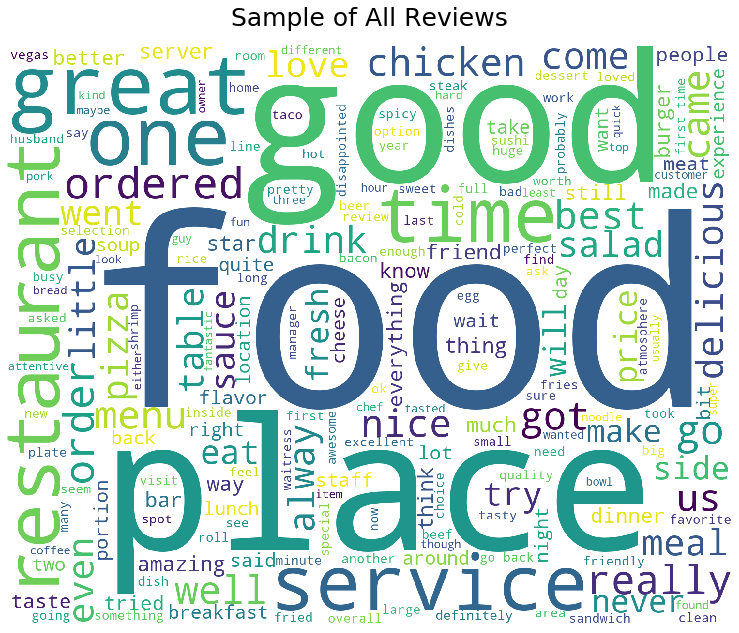

In [102]:
# Word cloud for sample of all reviews
Cloud(reviews_sample, title='Sample of All Reviews')

In [56]:
restaurant = r_df[r_df.business_id == '4JNXUYY8wbaaDmk3BPzlWw']

In [57]:
len(restaurant)

8514

In [97]:
# Word cloud for all reviews for a single restaurant that has a lot of reviews
restaurant = r_df[r_df.business_id == '4JNXUYY8wbaaDmk3BPzlWw']

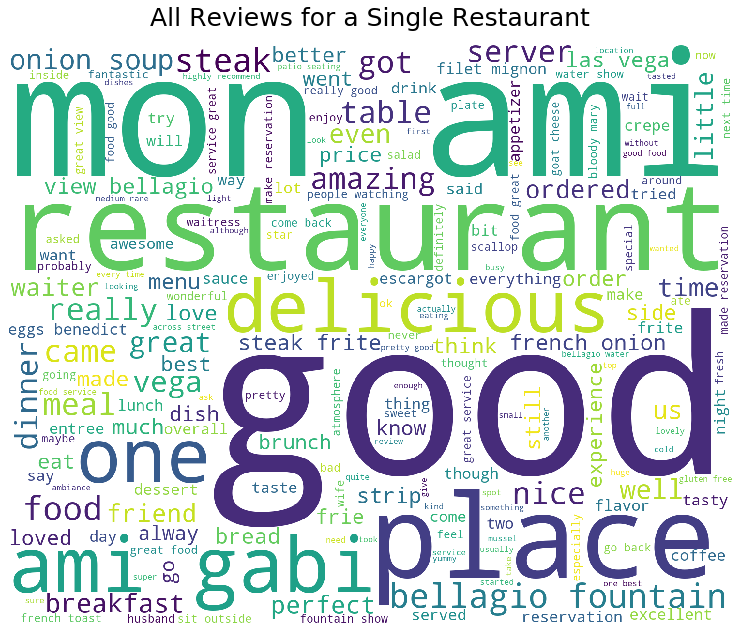

In [101]:
Cloud(restaurant.text, title='All Reviews for a Single Restaurant')

In [46]:
# Most frequent city in DataFrame
r_df.city.mode()

0    Las Vegas
dtype: object

In [39]:
# Word cloud for reviews of restaurants in a single city, using the most frequent city in the DataFrame
city = r_df[r_df.city == r_df.city.mode()[0]]

In [40]:
len(city)

1236663

In [41]:
# Use sample from the city df since it is so large
city_sample = city.text.sample(n=1000, random_state=7)

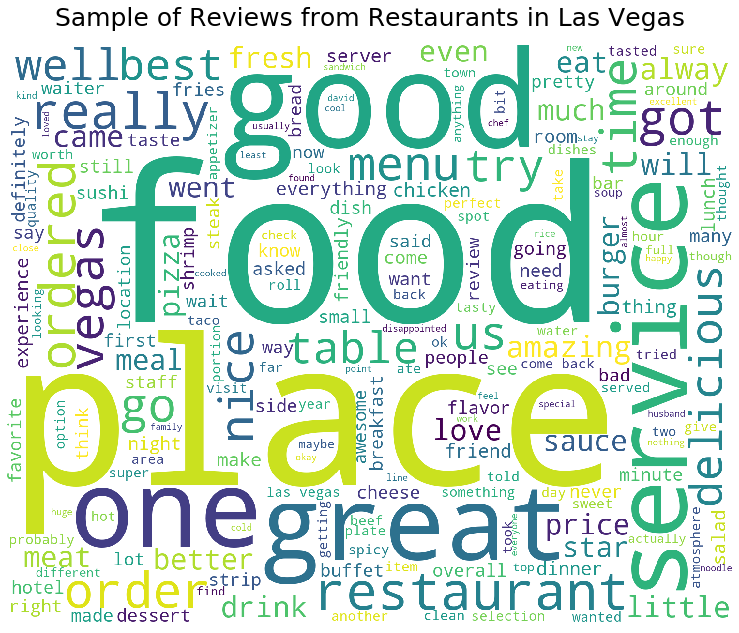

In [103]:
# Word cloud for sample of reviews from restaurants in Las Vegas
Cloud(city_sample, title='Sample of Reviews from Restaurants in Las Vegas')

In [44]:
# Most frequent category in DataFrame
r_df.categories.mode()

0    Mexican, Restaurants
dtype: object

In [47]:
# Word cloud for reviews of restaurants in a single category
category = r_df[r_df.categories == r_df.categories.mode()[0]]

In [48]:
len(category)

55737

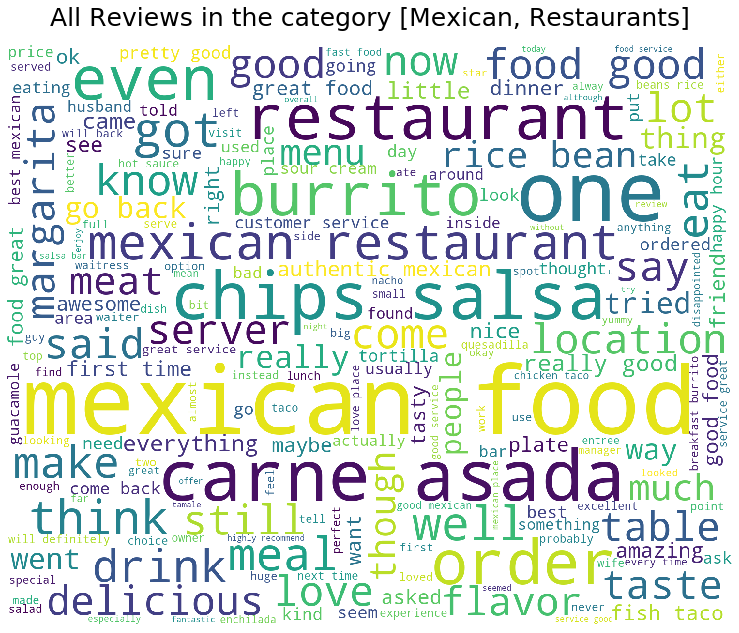

In [107]:
# Word cloud for reviews from restaurants in the category ['Mexican', 'Restaurants']
Cloud(category.text, title='All Reviews in the category [Mexican, Restaurants]')

In [51]:
# Most frequent user_id in DataFrame
r_df.user_id.mode()

0    CxDOIDnH8gp9KXzpBHJYXw
dtype: object

In [52]:
# Word cloud for reviews written by a single user
user = r_df[r_df.user_id == r_df.user_id.mode()[0]]

In [53]:
len(user)

2652

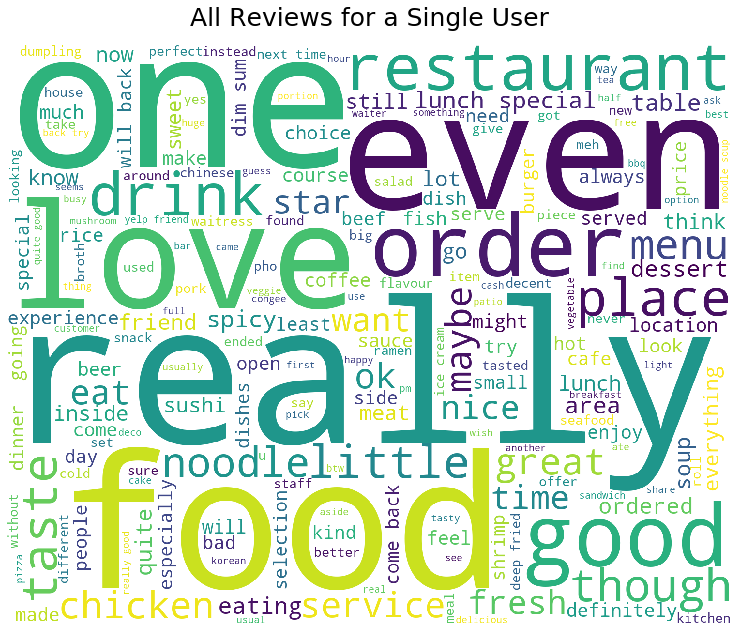

In [108]:
# Word cloud for reviews from user_id 'CxDOIDnH8gp9KXzpBHJYXw'
Cloud(user.text, title='All Reviews for a Single User')

## Constructing "Topics" ##

Let's now artificially construct some 'topics' consisting of groups of words, and inspect reviews containing at least one of the words in a topic.

In [60]:
positive_sentiment = ['good', 'delicious', 'yummy', 'tasty', 'superb', 'best', 'great', 'amazing', 'awesome']

In [62]:
# Reviews containing the positive sentiment words
positive_r_df = r_df[r_df['text'].str.contains('|'.join(positive_sentiment))]

In [63]:
len(positive_r_df)

3038376

If the words in 'positive_sentiment' reliably picked out positive reviews, then we can reasonably expect the proportion of reviews with higher star ratings to be higher in the positive_r_df than in the entire dataset r_df. Let's find out.

In [92]:
r_df.stars_y.value_counts(normalize=True)

5.0    0.393267
4.0    0.260942
3.0    0.133308
1.0    0.118880
2.0    0.093604
Name: stars_y, dtype: float64

In [93]:
positive_r_df.stars_y.value_counts(normalize=True)

5.0    0.433088
4.0    0.293549
3.0    0.136533
2.0    0.078035
1.0    0.058795
Name: stars_y, dtype: float64

Interestingly, the proportion of reviews with higher star ratings in the positive_r_df is a little higher than the proportion of higher star ratings in r_df, but the difference is not dramatic.

In [67]:
positive_r_df_sample = positive_r_df.text.sample(n=1000, random_state=7)

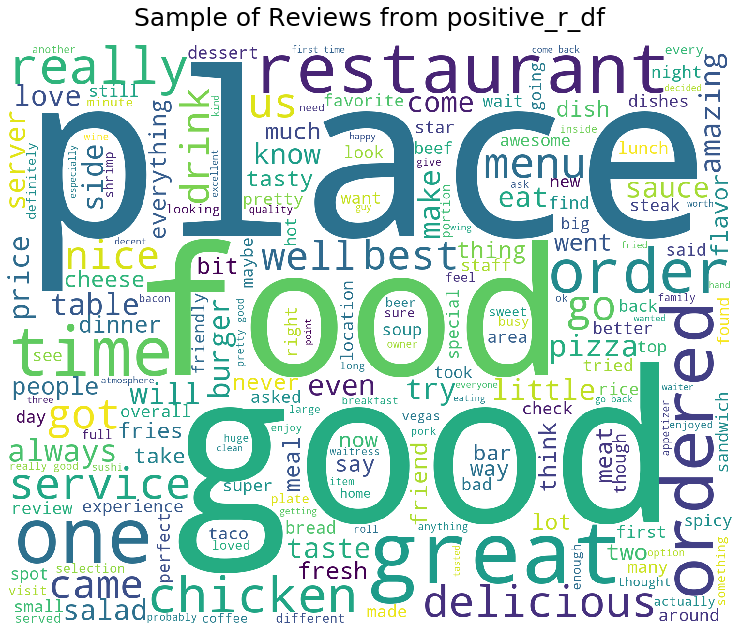

In [109]:
Cloud(positive_r_df_sample, title='Sample of Reviews from positive_r_df')

In [61]:
negative_sentiment = ['bad', 'disgusting', 'gross', 'nasty', 'terrible', 'worst', 'horrible']

In [69]:
# Reviews containing the negative sentiment words
negative_r_df = r_df[r_df['text'].str.contains('|'.join(negative_sentiment))]

In [70]:
len(negative_r_df)

524864

As we did above, let's compare the proportions of star ratings in negative_r_df and r_df.

In [92]:
r_df.stars_y.value_counts(normalize=True)

5.0    0.393267
4.0    0.260942
3.0    0.133308
1.0    0.118880
2.0    0.093604
Name: stars_y, dtype: float64

In [94]:
negative_r_df.stars_y.value_counts(normalize=True)

1.0    0.349273
2.0    0.191107
3.0    0.183714
4.0    0.156397
5.0    0.119509
Name: stars_y, dtype: float64

In [71]:
negative_r_df_sample = negative_r_df.text.sample(n=1000, random_state=7)

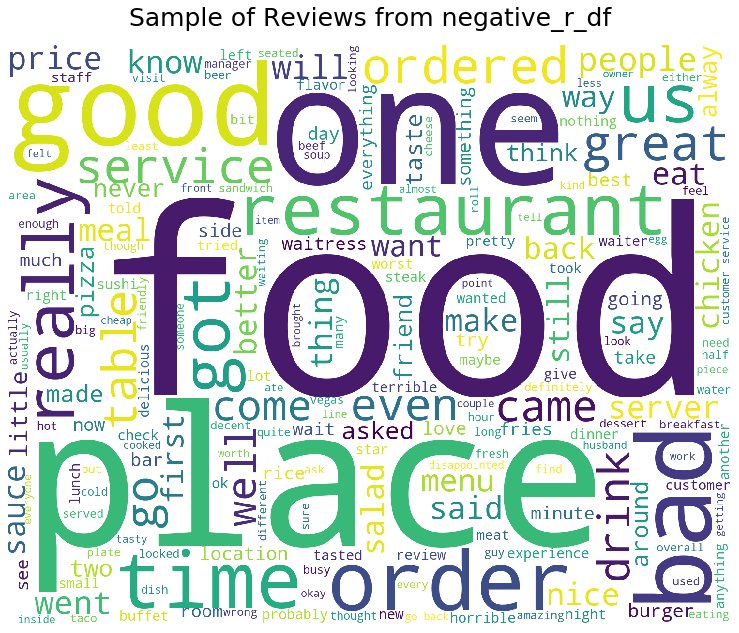

In [110]:
Cloud(negative_r_df_sample, title='Sample of Reviews from negative_r_df')

In [74]:
good_service = ['customer', 'service', 'prompt', 'nice', 'kind', 'attentive', 'exceptional']

In [75]:
# Reviews containing the good_service words
good_service_r_df = r_df[r_df['text'].str.contains('|'.join(good_service))]

In [76]:
len(good_service_r_df)

1923987

As we did above, let's compare the proportions of star ratings in good_service_r_df and r_df.

In [92]:
r_df.stars_y.value_counts(normalize=True)

5.0    0.393267
4.0    0.260942
3.0    0.133308
1.0    0.118880
2.0    0.093604
Name: stars_y, dtype: float64

In [91]:
good_service_r_df.stars_y.value_counts(normalize=True)

5.0    0.372261
4.0    0.265748
3.0    0.145154
1.0    0.117322
2.0    0.099515
Name: stars_y, dtype: float64

In [77]:
good_service_r_df_sample = good_service_r_df.text.sample(n=1000, random_state=7)

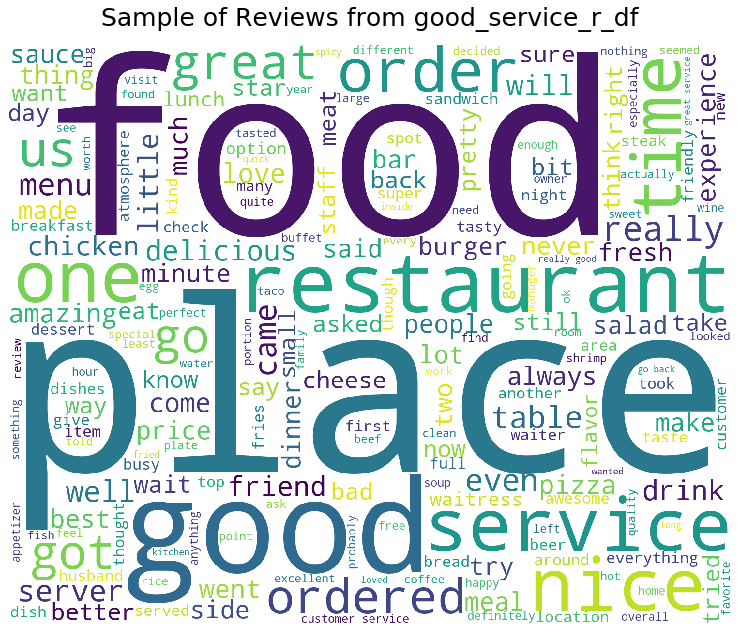

In [111]:
Cloud(good_service_r_df_sample, title='Sample of Reviews from good_service_r_df')

In [80]:
bad_service = ['customer', 'service', 'slow', 'rude', 'mean', 'poor']

In [81]:
# Reviews containing the bad_service words
bad_service_r_df = r_df[r_df['text'].str.contains('|'.join(bad_service))]

In [82]:
len(bad_service_r_df)

1465570

As we did above, let's compare the proportions of star ratings in bad_service_r_df and r_df.

In [92]:
r_df.stars_y.value_counts(normalize=True)

5.0    0.393267
4.0    0.260942
3.0    0.133308
1.0    0.118880
2.0    0.093604
Name: stars_y, dtype: float64

In [95]:
bad_service_r_df.stars_y.value_counts(normalize=True)

5.0    0.351618
4.0    0.232529
1.0    0.161739
3.0    0.139620
2.0    0.114494
Name: stars_y, dtype: float64

In [83]:
bad_service_r_df_sample = bad_service_r_df.text.sample(n=1000, random_state=7)

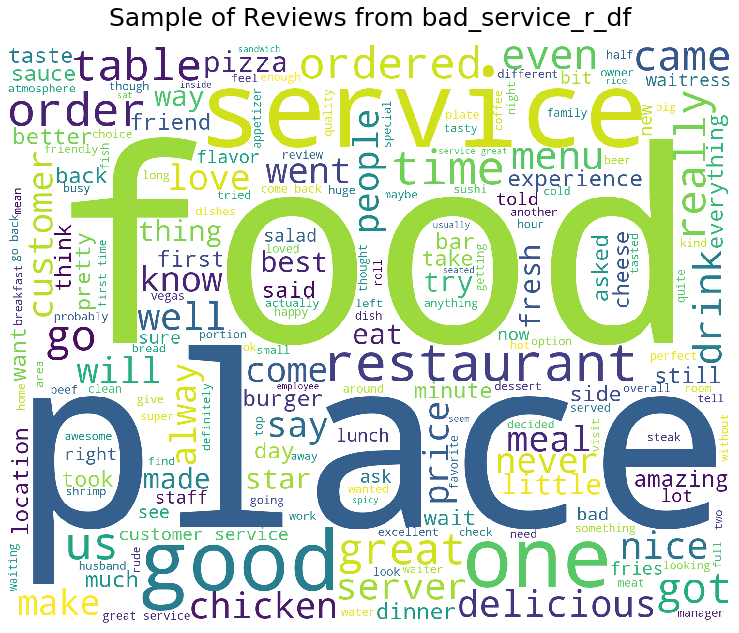

In [112]:
Cloud(bad_service_r_df_sample, title='Sample of Reviews from bad_service_r_df')

In [113]:
mexican_food = ['burrito', 'taco', 'salsa', 'carne asada', 'tortilla', 'guacamole', 'fajita', 'enchilada']

In [114]:
# Reviews containing the mexican_food words
mexican_food_r_df = r_df[r_df['text'].str.contains('|'.join(mexican_food))]

In [115]:
len(mexican_food_r_df)

299525

Let's see what restaurant categories are included in mexican_food_r_df.

In [117]:
mexican_food_r_df.categories.value_counts()

Mexican, Restaurants                                                                                                                 33963
Restaurants, Mexican                                                                                                                 32275
Mexican, Tacos, Restaurants                                                                                                           2941
Restaurants, Mexican, Tacos                                                                                                           2183
Fast Food, Mexican, Restaurants                                                                                                       1891
Vegetarian, New Mexican Cuisine, Cafes, Restaurants, Mexican, Bars, Breakfast & Brunch, Tacos, Vegan, Seafood, Nightlife, Tex-Mex     1654
Restaurants, Mexican, Food                                                                                                            1560
Restaurants, Mexican, Fast 

In [118]:
mexican_food_r_df_sample = mexican_food_r_df.text.sample(n=1000, random_state=7)

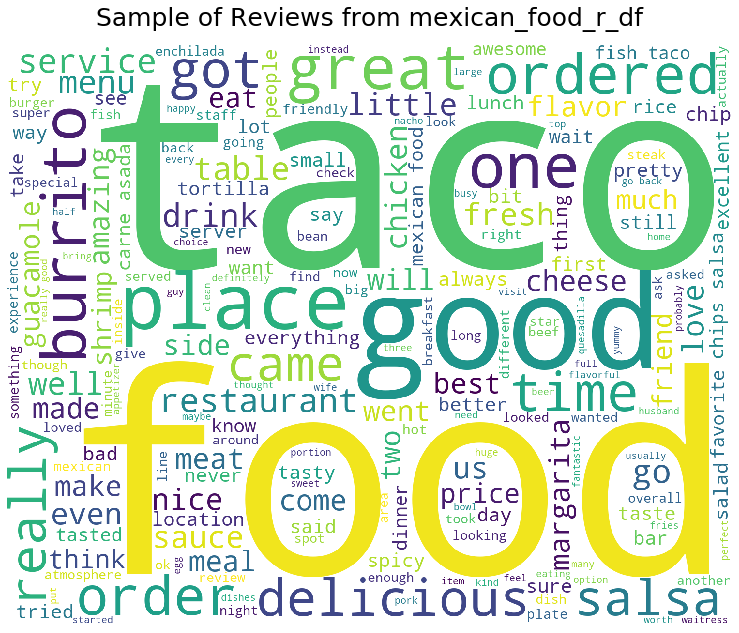

In [119]:
Cloud(mexican_food_r_df_sample, title='Sample of Reviews from mexican_food_r_df')

Interestingly, restaurants in a wide variety of categories appear to serve mexican food.

## Conclusion ##

Although the artificial topics constructed above pick out a slightly different distribution of star ratings compared to the distribution in the overall data set, the differences are not drastic. This suggests that the artificial topics (or at least the implementation of them) are only marginally useful for identifying reviews that include those topics.

It is still interesting to inspect the word clouds, and it will be helpful later when we are inspecting the results of the topic model to compare the generated topics to the word clouds created here.